In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import (
    LinearRegression, HuberRegressor, SGDRegressor,
    OrthogonalMatchingPursuit, Lasso, Ridge, ElasticNet
)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Set random seed for reproducibility
np.random.seed(42)
# Display settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [37]:
# Load the dataset
file_path = os.path.join(os.getcwd(),"data", "dynamic_pricing.csv")  # Replace with the correct file path
data = pd.read_csv(file_path)

# Initial data overview
print("Shape of the dataset:", data.shape)
print("\nFirst 5 rows of the dataset:")
print(data.head())


Shape of the dataset: (1000, 10)

First 5 rows of the dataset:
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                     

In [38]:

print("\nDataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB
None


In [39]:

print("\nSummary statistics:")
print(data.describe())


Summary statistics:
       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000                25.99344

In [40]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Remove duplicates if present
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicates removed. New shape:", data.shape)


Number of duplicate rows: 0



Pairplot of numerical features:


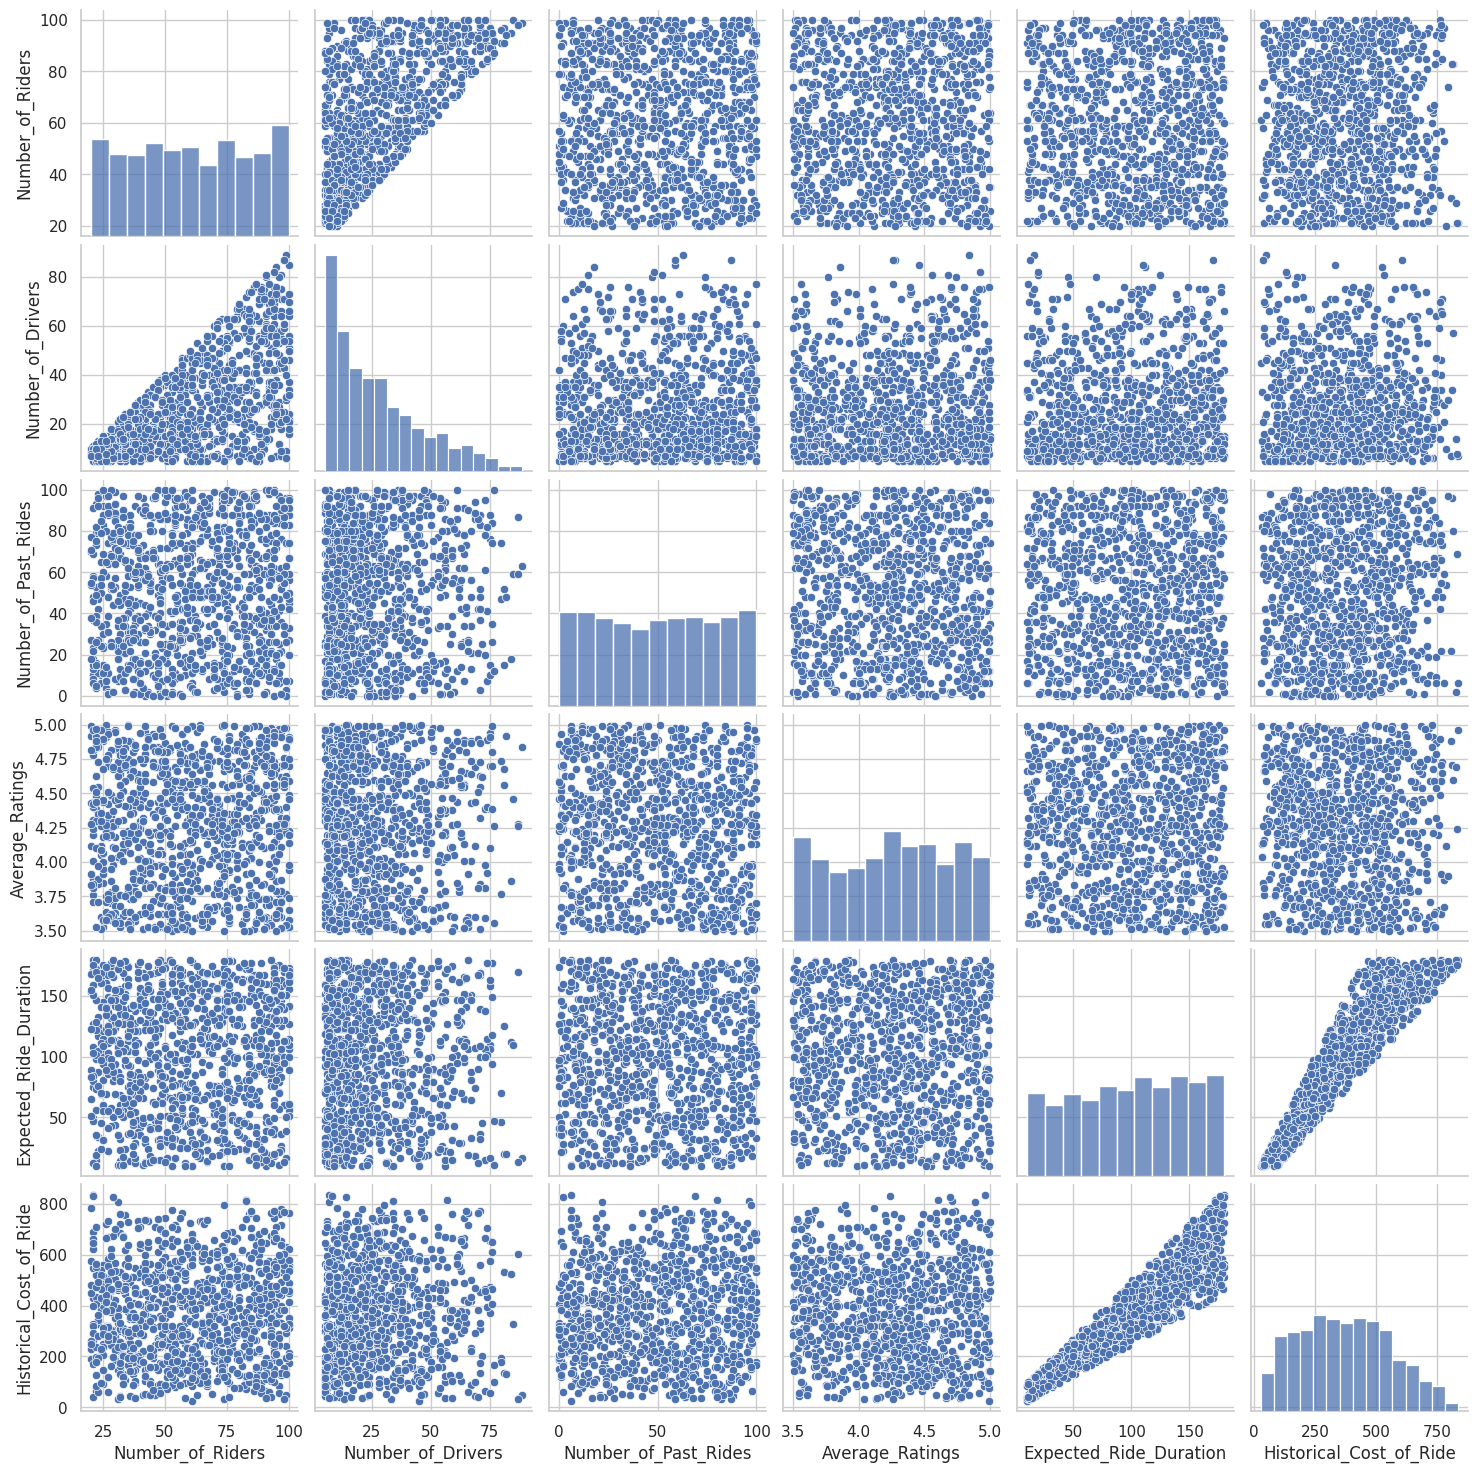

In [41]:
# Feature pair plots
print("\nPairplot of numerical features:")
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(data[numeric_columns])
plt.show()


Categorical columns: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

Value counts for 'Location_Category':
Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64


/tmp/ipykernel_5888/323051421.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], order=data[col].value_counts().index, palette="viridis")


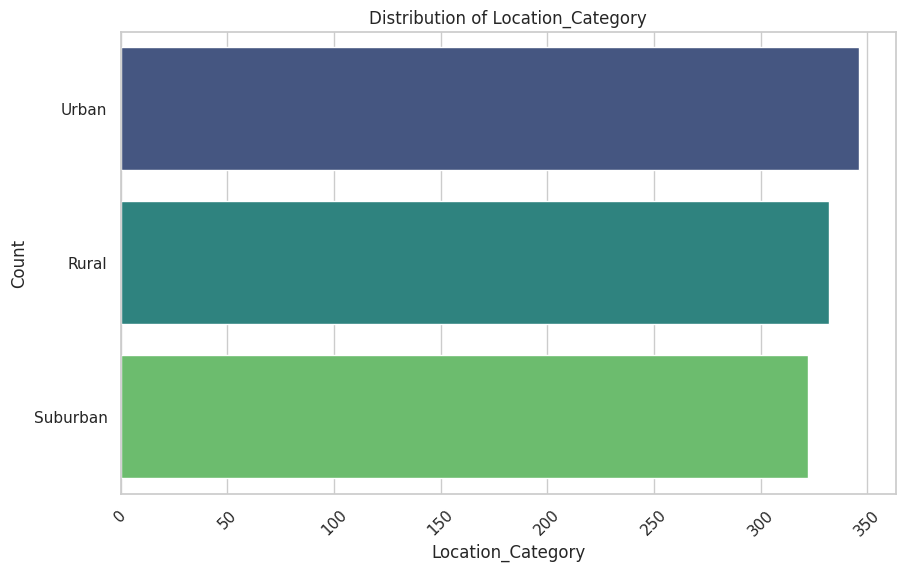


Value counts for 'Customer_Loyalty_Status':
Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64


/tmp/ipykernel_5888/323051421.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], order=data[col].value_counts().index, palette="viridis")


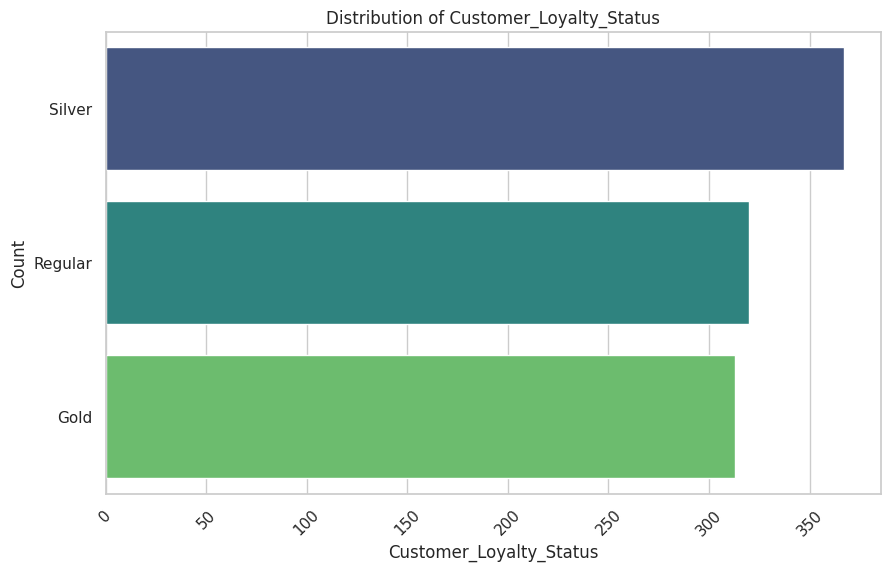

/tmp/ipykernel_5888/323051421.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], order=data[col].value_counts().index, palette="viridis")



Value counts for 'Time_of_Booking':
Time_of_Booking
Night        276
Afternoon    247
Morning      246
Evening      231
Name: count, dtype: int64


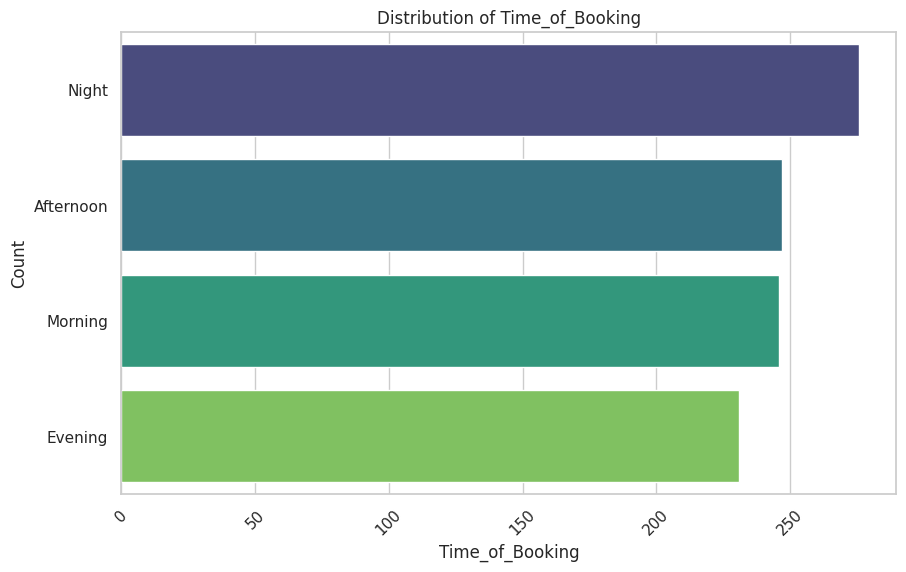


Value counts for 'Vehicle_Type':
Vehicle_Type
Premium    522
Economy    478
Name: count, dtype: int64


/tmp/ipykernel_5888/323051421.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], order=data[col].value_counts().index, palette="viridis")


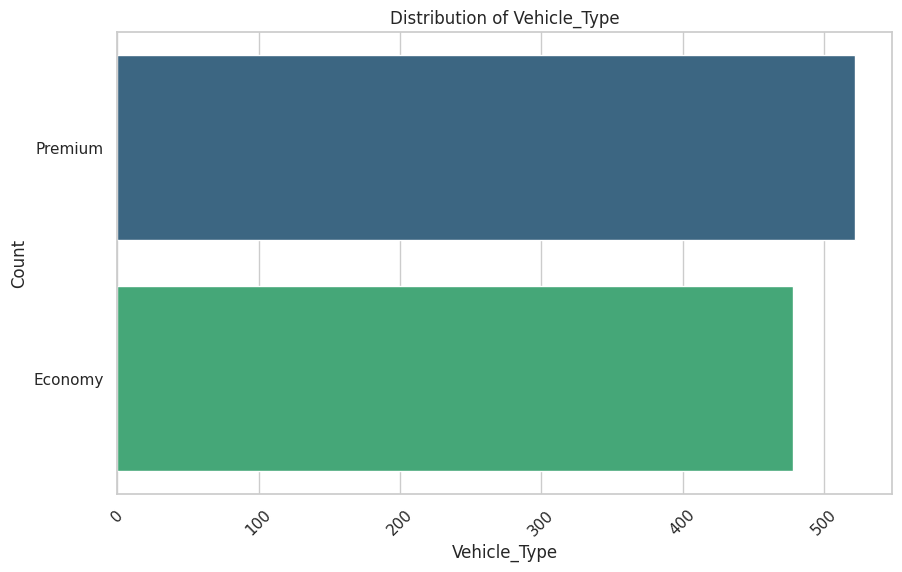

In [42]:
# Analyze categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical columns:", list(categorical_columns))

for col in categorical_columns:
    print(f"\nValue counts for '{col}':")
    print(data[col].value_counts())

    # Bar plot for each categorical variable
    plt.figure(figsize=(10, 6))
    sns.countplot(data[col], order=data[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipykernel_5888/3602225178.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Historical_Cost_of_Ride'], palette="coolwarm")


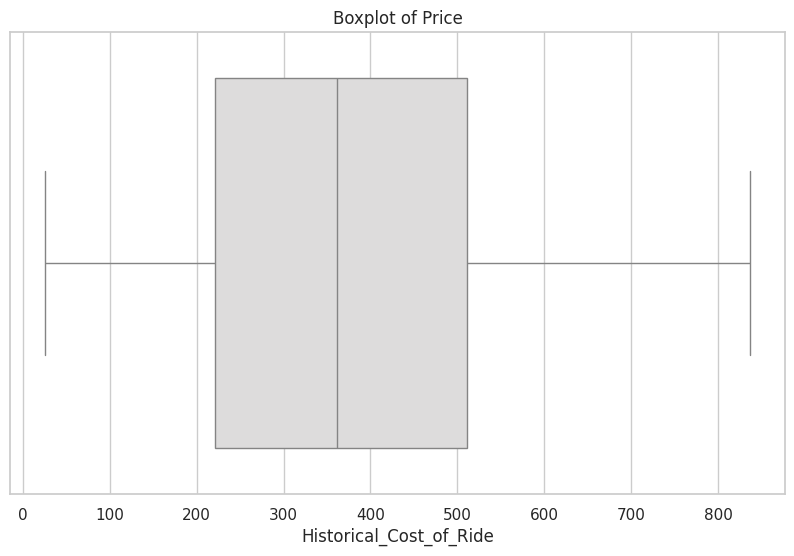

In [43]:
# Check for outliers using box plots (example: for 'price')
if 'Historical_Cost_of_Ride' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['Historical_Cost_of_Ride'], palette="coolwarm")
    plt.title("Boxplot of Price")
    plt.show()


Target variable 'price' distribution:


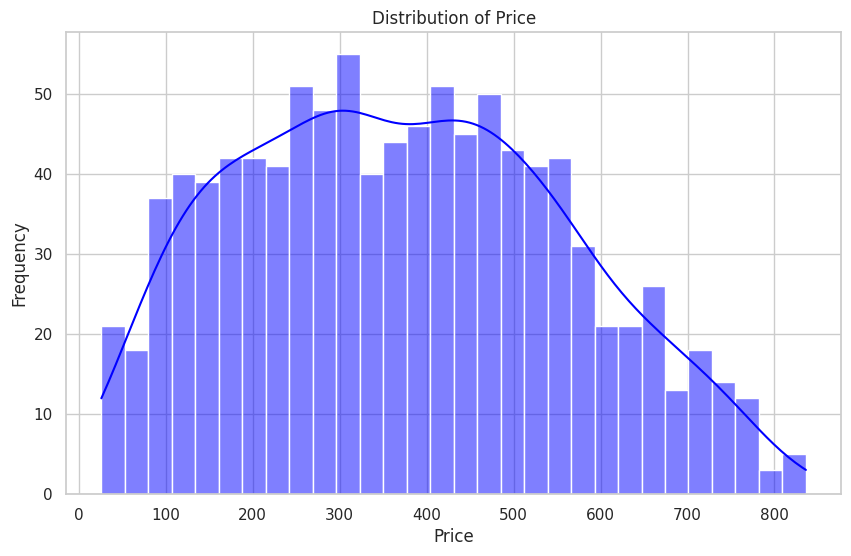

In [44]:
# Distribution of target variable (assume 'price' is the target)
if 'Historical_Cost_of_Ride' in data.columns:
    print("\nTarget variable 'price' distribution:")
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Historical_Cost_of_Ride'], kde=True, bins=30, color='blue')
    plt.title("Distribution of Price")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.show()

In [45]:
# Detect and handle outliers (example: using IQR method)
if 'Historical_Cost_of_Ride' in data.columns:
    Q1 = data['Historical_Cost_of_Ride'].quantile(0.25)
    Q3 = data['Historical_Cost_of_Ride'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\nPrice outlier thresholds: [{lower_bound}, {upper_bound}]")
    outliers = data[(data['Historical_Cost_of_Ride'] < lower_bound) | (data['Historical_Cost_of_Ride'] > upper_bound)]
    print(f"Number of outliers in 'Historical_Cost_of_Ride': {len(outliers)}")

    # Remove outliers
    data = data[(data['Historical_Cost_of_Ride'] >= lower_bound) & (data['Historical_Cost_of_Ride'] <= upper_bound)]
    print("Shape after outlier removal:", data.shape)


Price outlier thresholds: [-212.33325012902748, 944.1959566799039]
Number of outliers in 'Historical_Cost_of_Ride': 0
Shape after outlier removal: (1000, 10)


/tmp/ipykernel_5888/3470771496.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data['Historical_Cost_of_Ride'], palette="pastel")


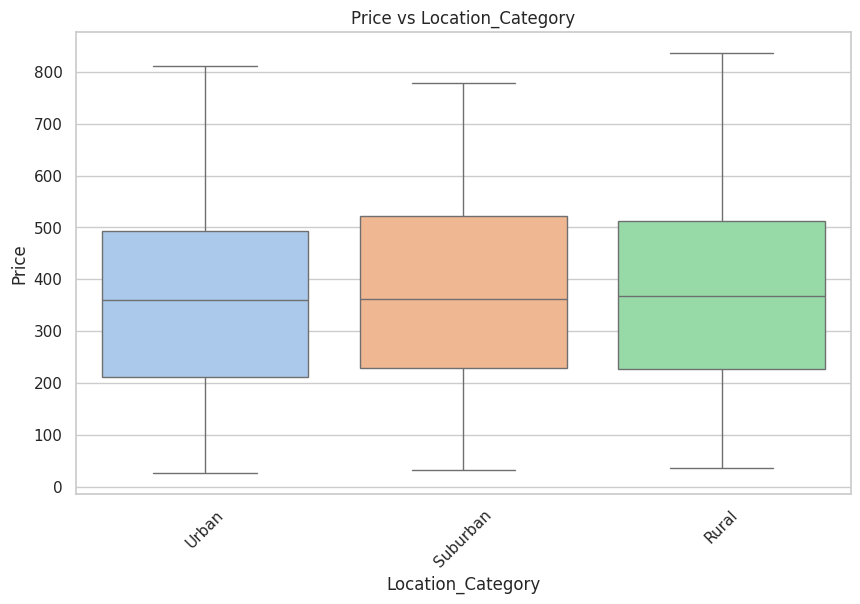

/tmp/ipykernel_5888/3470771496.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data['Historical_Cost_of_Ride'], palette="pastel")


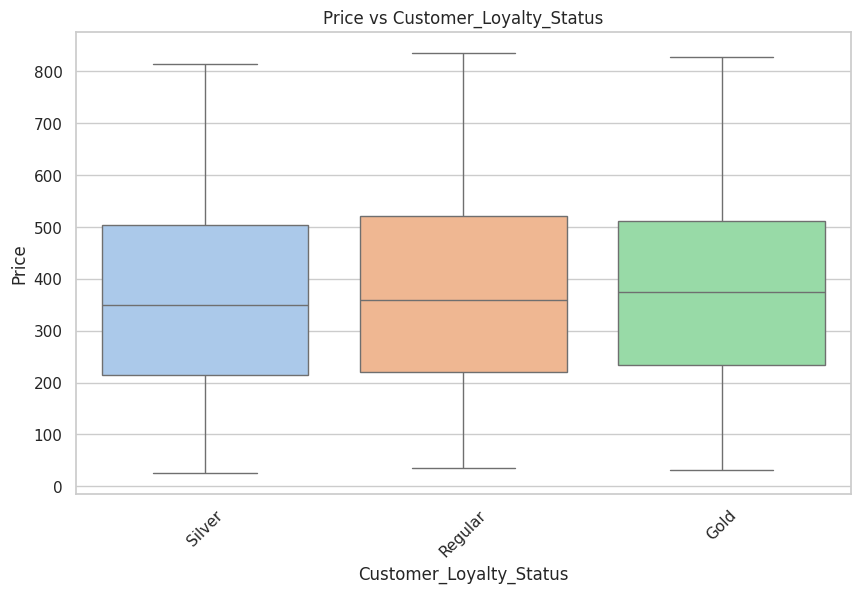

/tmp/ipykernel_5888/3470771496.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data['Historical_Cost_of_Ride'], palette="pastel")


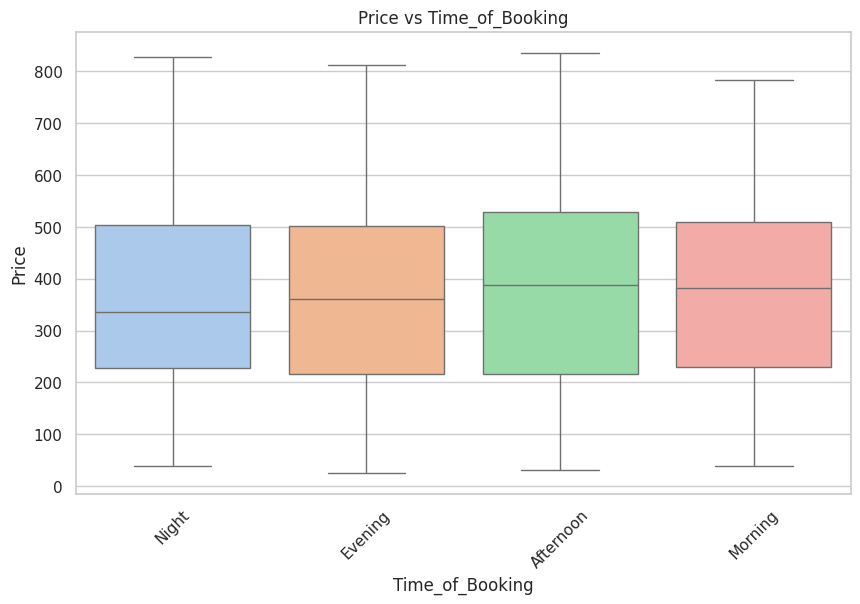

/tmp/ipykernel_5888/3470771496.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data['Historical_Cost_of_Ride'], palette="pastel")


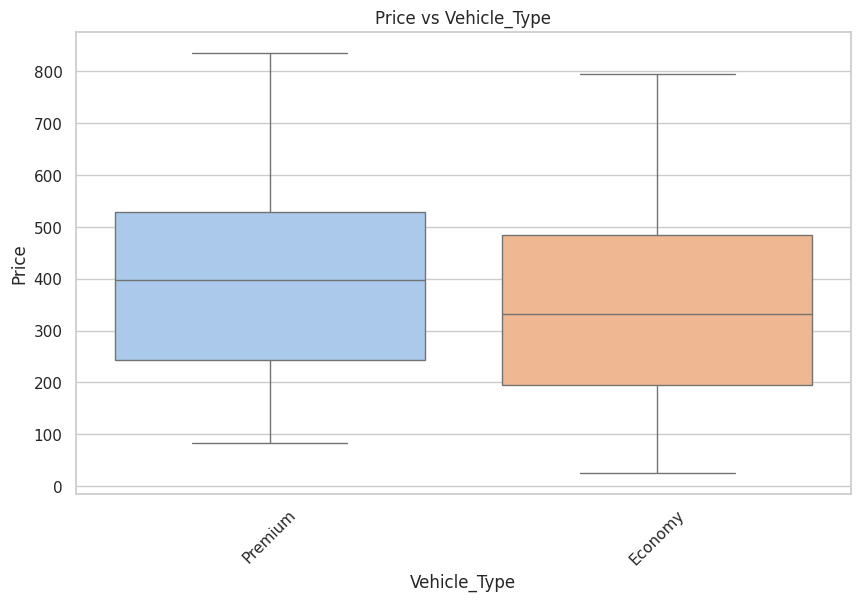

In [46]:
# Analyze relationships between features and target (example: 'price')
if 'Historical_Cost_of_Ride' in data.columns and len(categorical_columns) > 0:
    for col in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[col], y=data['Historical_Cost_of_Ride'], palette="pastel")
        plt.title(f"Price vs {col}")
        plt.xlabel(col)
        plt.ylabel("Price")
        plt.xticks(rotation=45)
        plt.show()


In [47]:
# One-hot encoding for all categorical variables
data_one_hot = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print("Dataset after One-Hot Encoding:")
print(data_one_hot.head())


Dataset after One-Hot Encoding:
   Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  Average_Ratings  \
0                90                 45                    13             4.47   
1                58                 39                    72             4.06   
2                42                 31                     0             3.99   
3                89                 28                    67             4.31   
4                78                 22                    74             3.77   

   Expected_Ride_Duration  Historical_Cost_of_Ride  \
0                      90               284.257273   
1                      43               173.874753   
2                      76               329.795469   
3                     134               470.201232   
4                     149               579.681422   

   Location_Category_Suburban  Location_Category_Urban  \
0                       False                     True   
1                        True           

In [48]:
data_one_hot = data_one_hot.apply(pd.to_numeric)
print(data_one_hot.head())

   Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  Average_Ratings  \
0                90                 45                    13             4.47   
1                58                 39                    72             4.06   
2                42                 31                     0             3.99   
3                89                 28                    67             4.31   
4                78                 22                    74             3.77   

   Expected_Ride_Duration  Historical_Cost_of_Ride  \
0                      90               284.257273   
1                      43               173.874753   
2                      76               329.795469   
3                     134               470.201232   
4                     149               579.681422   

   Location_Category_Suburban  Location_Category_Urban  \
0                       False                     True   
1                        True                    False   
2             

In [49]:
new_categorical_columns = [col for col in data_one_hot.columns if data_one_hot[col].dtype == 'bool']

print("Categorical columns to convert:", new_categorical_columns)
# Convert only the categorical columns (boolean) to integers
data_one_hot[new_categorical_columns] = data_one_hot[new_categorical_columns].astype(int)
# Verify data types of the columns
print(data_one_hot.dtypes)

# Ensure values are 0 and 1
for col in new_categorical_columns:
    print(f"{col}: {data_one_hot[col].unique()}")

Categorical columns to convert: ['Location_Category_Suburban', 'Location_Category_Urban', 'Customer_Loyalty_Status_Regular', 'Customer_Loyalty_Status_Silver', 'Time_of_Booking_Evening', 'Time_of_Booking_Morning', 'Time_of_Booking_Night', 'Vehicle_Type_Premium']
Number_of_Riders                     int64
Number_of_Drivers                    int64
Number_of_Past_Rides                 int64
Average_Ratings                    float64
Expected_Ride_Duration               int64
Historical_Cost_of_Ride            float64
Location_Category_Suburban           int64
Location_Category_Urban              int64
Customer_Loyalty_Status_Regular      int64
Customer_Loyalty_Status_Silver       int64
Time_of_Booking_Evening              int64
Time_of_Booking_Morning              int64
Time_of_Booking_Night                int64
Vehicle_Type_Premium                 int64
dtype: object
Location_Category_Suburban: [0 1]
Location_Category_Urban: [1 0]
Customer_Loyalty_Status_Regular: [0 1]
Customer_Loyalty_S

In [50]:
data_one_hot= data_one_hot[:500]

In [51]:
# Generate a synthetic regression dataset
X = data_one_hot.drop('Historical_Cost_of_Ride', axis=1)  # Exclude the target variable
y = data_one_hot['Historical_Cost_of_Ride']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
#"OrthogonalMatchingPursuit": (OrthogonalMatchingPursuit(fit_intercept=False), {"n_nonzero_coefs": [5, 6, 7, 8, 9, 10, 15]}),
# Define models and their hyperparameter grids
models_and_params = {
    #"LinearRegression": (LinearRegression(fit_intercept=False), {}),
    "HuberRegressor": (HuberRegressor(fit_intercept=False), {"alpha": np.logspace(-2, 1, 5), "epsilon": [1.35, 1.5, 1.75]}),
    "SGDRegressor": (SGDRegressor(fit_intercept=False, penalty=None, max_iter=1000, tol=1e-3),
                      {"alpha": np.logspace(-4, -1, 4), "learning_rate": ["constant", "optimal", "invscaling"], "eta0": [0.01, 0.1, 1.0]}),

    "Lasso": (Lasso(fit_intercept=False), {"alpha": np.logspace(-3, 0, 4)}),
    "Ridge": (Ridge(fit_intercept=False), {"alpha": np.logspace(-2, 1, 5), "solver": ["auto", "svd", "cholesky"]}),
    "ElasticNet": (ElasticNet(fit_intercept=False), {"alpha": np.logspace(-3, 0, 4), "l1_ratio": [0.1, 0.5, 0.9]})
}

# Evaluate models
results = []
for name, (model, params) in models_and_params.items():
    try:
        # Perform grid search with cross-validation
        grid_search = GridSearchCV(model, params, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Get best model and its performance
        best_model = grid_search.best_estimator_
        best_score = -grid_search.best_score_  # Convert negative MSE to positive
        best_params = grid_search.best_params_

        # Test data evaluation
        y_test_pred = best_model.predict(X_test)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        # Fit the best model to retrieve coefficients
        best_model.fit(X_train, y_train)
        coefficients = best_model.coef_

        results.append({
            "Model": name,
            "Best_Params": best_params,
            "Mean_CV_MAE": best_score,
            "Test_MAE": test_mse,
            "Test_R2": test_r2,
            "Coefficients": coefficients
        })
    except Exception as e:
        print(f"Model {name} failed with error: {e}")


# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Sort by performance (Mean CV MSE)
results_df = results_df.sort_values(by="Test_MAE")

# Add coefficients to the results DataFrame
results_df["Coefficients"] = results_df["Coefficients"].apply(lambda coef: np.array2string(coef, precision=3, separator=","))

# Display results
print("Model Performance (Train and Test):")
print(results_df[["Model", "Mean_CV_MAE", "Test_MAE", "Test_R2"]])

# Display Coefficients of the Top Model
top_model_row = results_df.iloc[0]  # Get the best-performing model
print("\nTop Model Details:")
print(f"Model: {top_model_row['Model']}")
print(f"Mean CV MAE: {top_model_row['Mean_CV_MAE']}")
print(f"Test MAE: {top_model_row['Test_MAE']}")
print(f"Test R2: {top_model_row['Test_R2']}")
print(f"Best Params: {top_model_row['Best_Params']}")
print(f"Coefficients:\n{top_model_row['Coefficients']}")

# Save the results as CSV (optional)
#results_df.to_csv("model_results.csv", index=False)



Training set shape: (400, 13) (400,)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Inc

Model Performance (Train and Test):
            Model   Mean_CV_MAE      Test_MAE       Test_R2
2           Lasso  5.010522e+01  4.608666e+03  8.402218e-01
0  HuberRegressor  5.044169e+01  4.625875e+03  8.396252e-01
4      ElasticNet  5.037877e+01  4.636735e+03  8.392487e-01
3           Ridge  5.039705e+01  4.655197e+03  8.386086e-01
1    SGDRegressor  3.245404e+12  1.312787e+24 -4.551314e+19

Top Model Details:
Model: Lasso
Mean CV MAE: 50.10522419464269
Test MAE: 4608.66593188636
Test R2: 0.840221778650627
Best Params: {'alpha': np.float64(1.0)}
Coefficients:
[-0.141, 0.289, 0.   , 0.164, 3.495, 0.   ,-0.155, 8.267, 0.   ,-2.748,
  0.   , 8.32 ,40.06 ]


In [52]:
# Extract top model details
top_model_row = results_df.iloc[0]
top_model_name = top_model_row["Model"]

# Get the best model and refit it on the training set to ensure coefficients are accessible
best_model = models_and_params[top_model_name][0]
best_model.set_params(**top_model_row["Best_Params"])
best_model.fit(X_train, y_train)

# Extract coefficients (exclude intercept)
coefficients = best_model.coef_

# Construct the equation, excluding features with zero coefficients
features = X_train.columns
non_zero_terms = [(coef, feature) for coef, feature in zip(coefficients, features) if coef != 0]

# Generate the equation string without intercept
equation_terms = [f"{coef:.3f}*{feature}" for coef, feature in non_zero_terms]
equation = "y = " + " + ".join(equation_terms) if equation_terms else "y = 0"

# Display the equation
print("\nTop Model as Equation (Excluding Zero Coefficients and Intercept):")
print(equation)


Top Model as Equation (Excluding Zero Coefficients and Intercept):
y = -0.141*Number_of_Riders + 0.289*Number_of_Drivers + 0.164*Average_Ratings + 3.495*Expected_Ride_Duration + -0.155*Location_Category_Urban + 8.267*Customer_Loyalty_Status_Regular + -2.748*Time_of_Booking_Evening + 8.320*Time_of_Booking_Night + 40.060*Vehicle_Type_Premium
